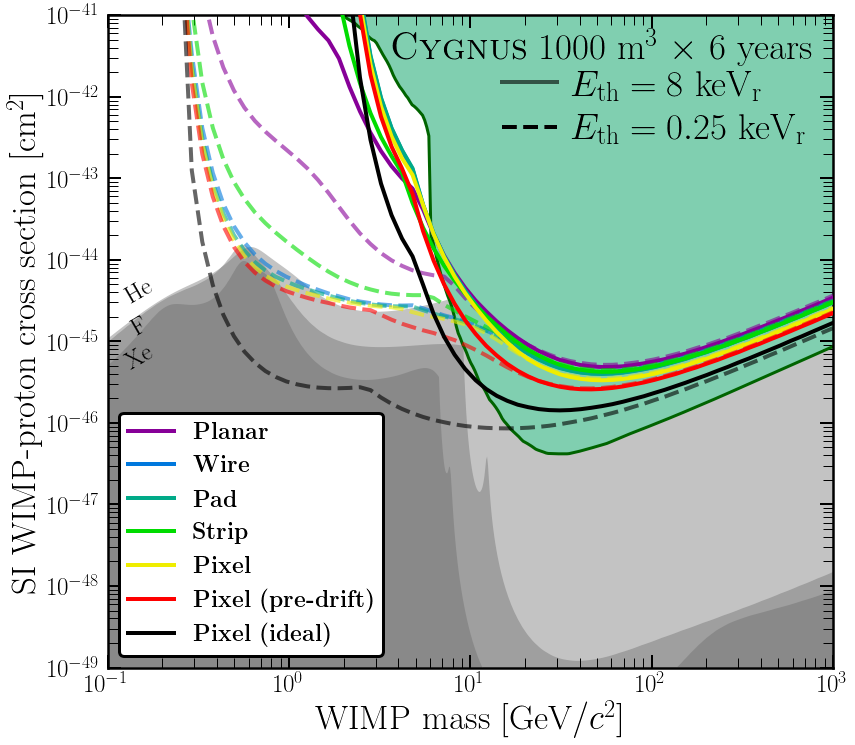

In [57]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import MakeLimitPlot_SI,MakeLimitPlot_SD,getlimSI,getlimSD

RS = 1.5
# Enhancement factors
A = 19
S_p = 0.478
J = 0.5
C_F = (4/3)*((J+1)/J)*(S_p)**2.0/A**2

Vstr = "1000"

nro = 7
fname = ["" for x in range(0,nro)]
fname[0] ="Gem"
fname[1] ="Wire"
fname[2] ="Pad"
fname[3] ="Strip"
fname[4] ="Pixel"
fname[5] ="Predrift"
fname[6] ="Ideal"
nm = 70

maxy = 1.0e-35
m_all = zeros(shape=(nro,nm))
data_all = zeros(shape=(nro,nm))
data_all_SD = zeros(shape=(nro,nm))
for i in range(0,nro):
    m_all[i,:],data_all[i,:] = getlimSI(Vstr,fname[i]+'_maxth',RS,maxy)
    m_all[i,:],data_all_SD[i,:] = getlimSD(Vstr,fname[i]+'_maxth',C_F,maxy)
data_all[data_all==0] = nan

maxy = 1.0e-35
m_all1 = zeros(shape=(nro,nm))
data_all1 = zeros(shape=(nro,nm))
data_all1_SD = zeros(shape=(nro,nm))
for i in range(0,nro):
    m_all1[i,:],data_all1[i,:] = getlimSI(Vstr,fname[i]+'_minth',RS,maxy)
    m_all1[i,:],data_all1_SD[i,:] = getlimSD(Vstr,fname[i]+'_minth',C_F,maxy)
data_all1[isnan(data_all1)] = 1.0e-40
data_all[isnan(data_all)] = 1.0e-39

labs = array(['Planar','Wire','Pad','Strip','Pixel','Pixel (pre-drift)','Pixel (ideal)'])

# SI
alph = 0.6
fig,ax = MakeLimitPlot_SI(Collected=True,xmin=0.1,xmax=1.0e3,ymin=1.0e-49,ymax=1.0e-41)
#plt.text(0.12,7e-45,r"$\nu$-{\bf floor}",fontsize=25,rotation=30,color="k")
plt.text(0.12,3e-45,r"He",fontsize=25,rotation=30,color="k")
plt.text(0.13,1.2e-45,r"F",fontsize=25,rotation=30,color="k")
plt.text(0.12,4.5e-46,r"Xe",fontsize=25,rotation=30,color="k")
col = cm.nipy_spectral(linspace(0.1,1,nro))
col[-1,:] = [0,0,0,1]
for i in range(0,nro):
    #plt.fill_between(m_all[i,:],data_all[i,:]/RS,y2=data_all1[i,:]/RS,color=col[i,:],alpha=0.1,lw=0.01,zorder=10-i)
    plt.loglog(m_all[i,:],data_all[i,:]/RS,'-',color=col[i,:],linewidth=4,label=r"{\bf "+labs[i]+"}",zorder=10)
    plt.loglog(m_all[i,:],data_all1[i,:]/RS,'--',color=col[i,:],linewidth=4,zorder=10,alpha=alph)

    leg1 = plt.legend(loc='lower left',fontsize=23,frameon=True,framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")
plt.gcf().text(0.88,0.83,r"{\sc Cygnus} "+Vstr+r" m$^3$ $\times$ 6 years",fontsize=37,color='k',horizontalalignment='right')
plt.gcf().text(0.62,0.78,r"$E_{\rm th} = 8$ keV$_{\rm r}$",fontsize=37,color='k',horizontalalignment='left')
plt.gcf().text(0.62,0.73,r"$E_{\rm th} = 0.25$ keV$_{\rm r}$",fontsize=37,color='k',horizontalalignment='left')
plt.plot([15,30],[4.2e-43,4.2e-43],'k--',lw=4)
plt.plot([15,30],[1.5e-42,1.5e-42],'k-',lw=4,alpha=alph)

plt.show()
fig.savefig('../plots/CYGNUS'+Vstr+'-readouts-SI.pdf',bbox_inches='tight')

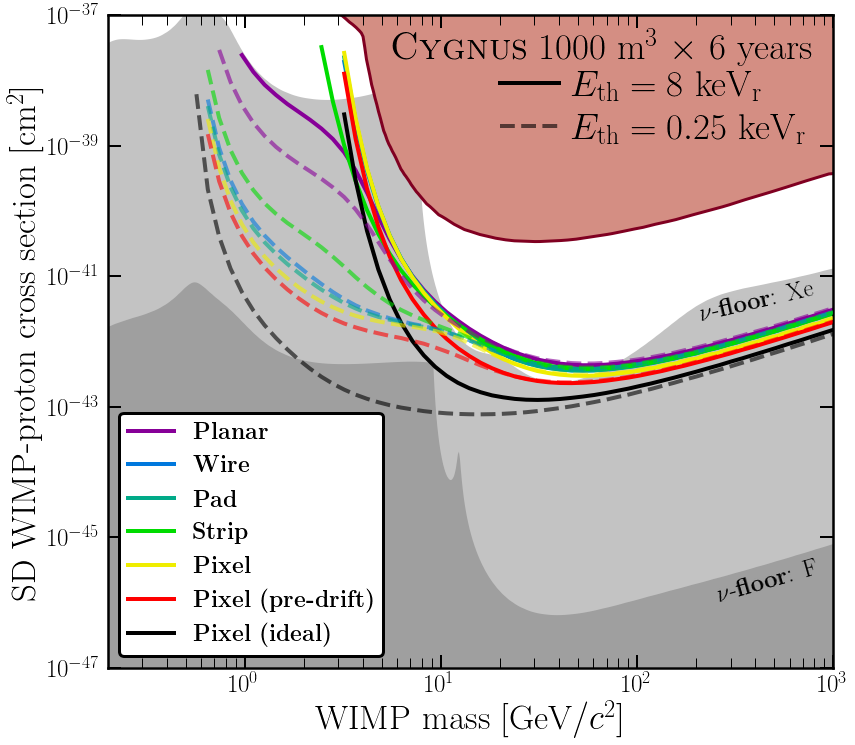

In [61]:
#### SD
fig,ax = MakeLimitPlot_SD(Collected=True,xmin=0.2,xmax=1.0e3,ymax=1.0e-37,ymin=1.0e-47)
plt.text(205.0,0.2e-41,r"$\nu$-{\bf floor}: Xe",fontsize=24,rotation=13,color="k")
plt.text(250.0,0.1e-45,r"$\nu$-{\bf floor}: F",fontsize=24,rotation=16,color="k")
for i in range(0,nro):
    plt.loglog(m_all[i,:],data_all_SD[i,:],'-',color=col[i,:],linewidth=4,label=r"{\bf "+labs[i]+"}")
    plt.loglog(m_all[i,:],data_all1_SD[i,:],'--',color=col[i,:],linewidth=4,zorder=10,alpha=alph)

leg1 = plt.legend(loc='lower left',fontsize=23,frameon=True,framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")
plt.gcf().text(0.88,0.83,r"{\sc Cygnus} "+Vstr+r" m$^3$ $\times$ 6 years",fontsize=37,color='k',horizontalalignment='right')
plt.gcf().text(0.62,0.78,r"$E_{\rm th} = 8$ keV$_{\rm r}$",fontsize=37,color='k',horizontalalignment='left')
plt.gcf().text(0.62,0.73,r"$E_{\rm th} = 0.25$ keV$_{\rm r}$",fontsize=37,color='k',horizontalalignment='left')
plt.plot([20,40],[2e-39,2e-39],'k--',lw=4,alpha=alph)
plt.plot([20,40],[0.9e-38,0.9e-38],'k-',lw=4)
plt.show()
fig.savefig('../plots/CYGNUS'+Vstr+'-readouts-SD.pdf',bbox_inches='tight')

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.



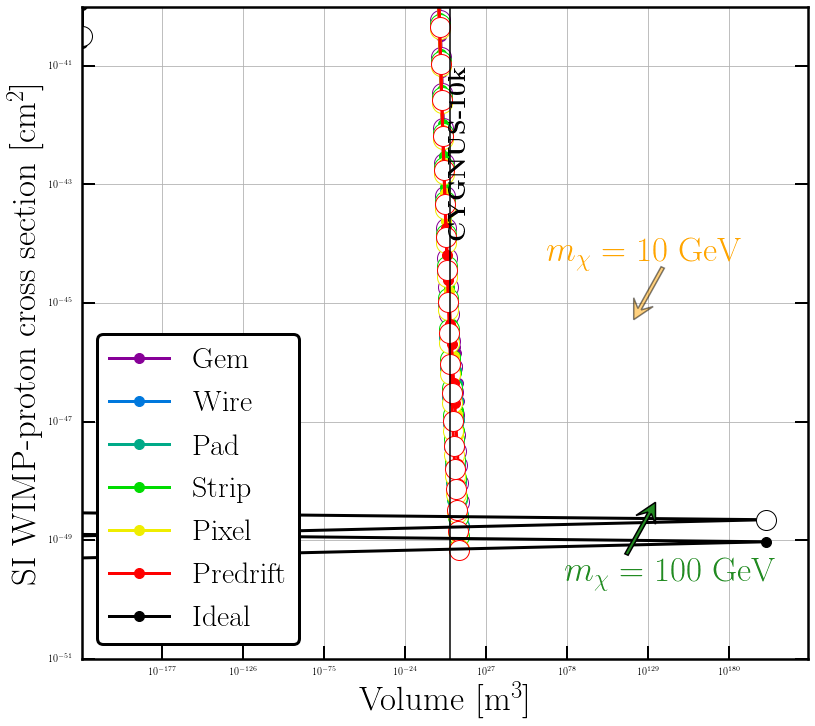

In [57]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)

xmin = 0.001
xmax = 1.0e10
ymax = 1.0e-40
ymin = 1.0e-51

for i in range(0,nro):
    C1 = loadtxt("../data/CYGNUS-Exposure-"+fname[i]+".txt")
    V = C1[0,:]
    NB8_1 = C1[3,:]
    ax1.loglog(V,C1[1,:],'.-',linewidth=3,color=col[i,:],markersize=20,label=fname[i])
    ax1.loglog(V,C1[4,:],'o-',linewidth=3,color=col[i,:],markersize=20,mfc='w')


# Legend
leg1 = ax1.legend(fontsize=30,frameon=True,loc="lower left",framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

# Vertical line
ax1.loglog([1e4,1e4],[ymin,ymax],'k-')
ax1.text(4000,1e-41,r'{\bf CYGNUS-10k}',fontsize=25,rotation=90,verticalalignment='top')


# Labels
ax2.set_xlabel(r"Number of neutrino events",fontsize=35,labelpad=15)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlabel(r'Volume [m$^3$]',fontsize=35)  # we already handled the x-label with ax1
ax1.set_xlim([V[0],V[-1]])


# Arrows
plt.gcf().text(0.62,0.58,r'$m_\chi = 10$ GeV',fontsize=35,color='Orange')
plt.gcf().text(0.64,0.21,r'$m_\chi = 100$ GeV',fontsize=35,color='ForestGreen')
ax1.arrow(0.75, 0.16, 0.04, 0.08, transform=ax1.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='ForestGreen',zorder=100)
ax1.arrow(0.8, 0.6, -0.04, -0.08, transform=ax1.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='Orange',alpha=0.5,zorder=100)

# Style
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)

plt.show()
fig.savefig('../plots/CYGNUS-indivMass_readoutcomparison.pdf',bbox_inches='tight')


In [58]:
V

array([5.36762411e-228, 5.36762411e-228, 2.88845574e-306, 2.88845574e-306,
       2.88845574e-306, 0.00000000e+000, 3.50306382e-311, 5.21501699e-305,
       2.89720959e-306,             nan, 7.07331948e-310, 6.37390965e-305,
       2.88845574e-306, 2.88845574e-306, 2.88845574e-306, 0.00000000e+000,
       3.28000983e+203, 2.05860850e-318, 0.00000000e+000, 0.00000000e+000])